In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%ls '/content/gdrive/MyDrive/Dataset/CT Lung'

 ChinaSet_AllFiles/   Montgomery/
 CT_Lung/            'rsna-pneumonia-detection-challenge.zip (Unzipped Files)'/
 mask/                src/
 model.png            unet_lung_seg.hdf5


In [ ]:
%cd '/content/gdrive/MyDrive/Dataset/CT Lung'

/content/gdrive/MyDrive/Dataset/CT Lung


In [ ]:
%ls

 ChinaSet_AllFiles/   Montgomery/
 CT_Lung/            'rsna-pneumonia-detection-challenge.zip (Unzipped Files)'/
 mask/                src/
 model.png            unet_lung_seg.hdf5


In [ ]:
%cd ..

/content/gdrive/MyDrive/Dataset


In [ ]:
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/augmentation"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/image"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/mask"
!mkdir "/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/dilate"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/augmentation’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/image’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/mask’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/train/dilate’: File exists


In [ ]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass
%pip install tensorflow-io

     |████████████████████████████████| 23.4 MB 66.7 MB/s 


In [ ]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd


from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

from glob import glob
from tqdm import tqdm


In [ ]:
INPUT_DIR = os.path.join('/content/gdrive/MyDrive/Dataset/CT Lung','src')
IMAGE_DIR = os.path.join('/content/gdrive/MyDrive/Dataset','CT Lung')
SEGMENTATION_DIR = os.path.join(INPUT_DIR, 'segmentation')
SEGMENTATION_TEST_DIR = os.path.join(SEGMENTATION_DIR, 'test')
SEGMENTATION_TRAIN_DIR = os.path.join(SEGMENTATION_DIR, 'train')
SEGMENTATION_AUG_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, 'augmentation')
SEGMENTATION_IMAGE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, 'image')
SEGMENTATION_MASK_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, 'mask')
SEGMENTATION_DILATE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, 'dilate')

SHENZEN_TRAIN_DIR = os.path.join(IMAGE_DIR, 'ChinaSet_AllFiles')


SHENZHEN_IMAGE_DIR = os.path.join(SHENZEN_TRAIN_DIR, "CXR_png")
SHENZHEN_MASK_DIR = os.path.join(IMAGE_DIR,"mask", "mask")

MONTGOMERY_TRAIN_DIR = os.path.join(IMAGE_DIR, "Montgomery", "MontgomerySet")
MONTGOMERY_IMAGE_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, "CXR_png")
MONTGOMERY_LEFT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, "ManualMask", "leftMask")
MONTGOMERY_RIGHT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR,"ManualMask", "rightMask")

DILATE_KERNEL = np.ones((15, 15), np.uint8)

BATCH_SIZE=2

#Prods
EPOCHS=56

#Desv

In [ ]:
from os import path
print(path.exists(INPUT_DIR))
print(path.exists(IMAGE_DIR))
print(path.exists(SEGMENTATION_DIR))
print(path.exists(SEGMENTATION_TEST_DIR))
print(path.exists(SEGMENTATION_TRAIN_DIR))
print(path.exists(SEGMENTATION_AUG_DIR))
print(path.exists(SEGMENTATION_IMAGE_DIR))
print(path.exists(SEGMENTATION_MASK_DIR))
print(path.exists(SEGMENTATION_DILATE_DIR))
print(path.exists(SHENZEN_TRAIN_DIR))
print(path.exists(SHENZHEN_IMAGE_DIR))
print(path.exists(SHENZHEN_MASK_DIR))
print(path.exists(MONTGOMERY_TRAIN_DIR))
print(path.exists(MONTGOMERY_IMAGE_DIR))
print(path.exists(MONTGOMERY_LEFT_MASK_DIR))
print(path.exists(MONTGOMERY_RIGHT_MASK_DIR))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
montgomery_left_mask_dir = glob(os.path.join(MONTGOMERY_LEFT_MASK_DIR, '*.png'))
montgomery_test = montgomery_left_mask_dir[0:50]
montgomery_train= montgomery_left_mask_dir[50:]

In [ ]:
montgomery_left_mask_dir

['/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0266_1.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0040_0.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0264_1.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0077_0.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0005_0.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0362_1.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0103_0.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0196_1.png',
 '/content/gdrive/MyDrive/Dataset/CT Lung/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0195_1.png',
 '/content/gdrive/MyDrive/Dataset/CT 

In [ ]:
for left_image_file in tqdm(montgomery_left_mask_dir):
    base_file = os.path.basename(left_image_file)
    image_file = os.path.join(MONTGOMERY_IMAGE_DIR, base_file)
    right_image_file = os.path.join(MONTGOMERY_RIGHT_MASK_DIR, base_file)

    image = cv2.imread(image_file)
    left_mask = cv2.imread(left_image_file, cv2.IMREAD_GRAYSCALE)
    right_mask = cv2.imread(right_image_file, cv2.IMREAD_GRAYSCALE)
    
    image = cv2.resize(image, (512, 512))
    left_mask = cv2.resize(left_mask, (512, 512))
    right_mask = cv2.resize(right_mask, (512, 512))
    
    mask = np.maximum(left_mask, right_mask)
    mask_dilate = cv2.dilate(mask, DILATE_KERNEL, iterations=1)
    
    if (left_image_file in montgomery_train):
        cv2.imwrite(os.path.join(SEGMENTATION_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_MASK_DIR, base_file), \
                    mask)
        cv2.imwrite(os.path.join(SEGMENTATION_DILATE_DIR, base_file), \
                    mask_dilate)
    else:
        filename, fileext = os.path.splitext(base_file)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_mask%s" % (filename, fileext)), mask)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)

100%|██████████| 138/138 [07:34<00:00,  3.30s/it]


In [ ]:
def add_colored_dilate(image, mask_image, dilate_image):
  mask_image_gray = cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)
  dilate_image_gray = cv2.cvtColor(dilate_image, cv2.COLOR_BGR2GRAY)

  mask = cv2.bitwise_and(mask_image, mask_image, mask = mask_image_gray)
  dilate = cv2.bitwise_and(dilate_image, dilate_image, mask = dilate_image_gray)

  mask_coord = np.where(mask != [0,0,0])
  dilate_coord = np.where(dilate != [0,0,0])

  mask[mask_coord[0], mask_coord[1], :] = [255,0,0]

  dilate[dilate_coord[0], dilate_coord[1], :] = [0,0,255]

  ret = cv2.addWeighted(image,0.7,dilate,0.3,0)
  ret = cv2.addWeighted(ret,0.7,mask,0.3,0)
  
  return ret

def add_colored_mask(image, mask_image):
  mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    
  mask = cv2.bitwise_and(mask_image, mask_image, mask=mask_image_gray)
  
  mask_coord = np.where(mask!=[0,0,0])

  mask[mask_coord[0],mask_coord[1],:]=[255,0,0]

  ret = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

  return ret

def diff_mask(ref_image, mask_image):
  mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

  mask = cv2.bitwise_and(mask_image, mask_image, mask = mask_image_gray)

  mask_coord = np.where(mask != [0,0,0])

  mask[mask_coord[0],mask_coord[1], :] = [255,0,0]

  ret = cv2.addWeighted(ref_image, 0.7, mask, 0.3, 0)
  return ret


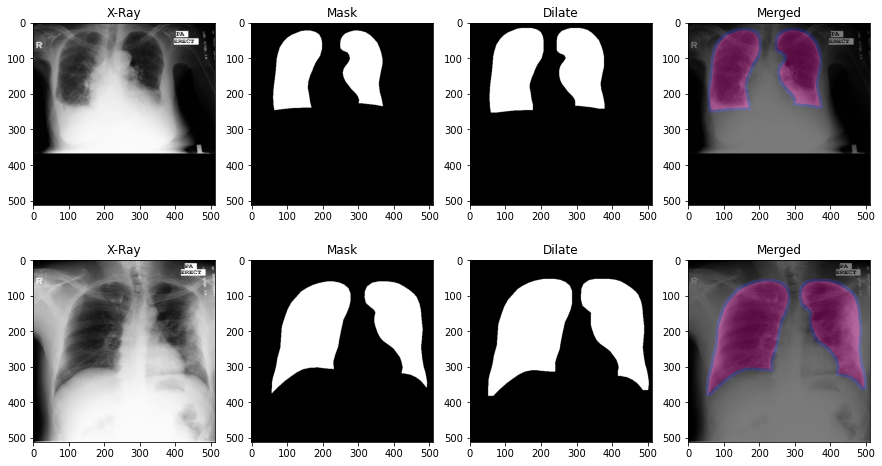

In [ ]:
base_file = os.path.basename(montgomery_train[0])

image_file = os.path.join(SEGMENTATION_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_MASK_DIR, base_file)
dilate_image_file = os.path.join(SEGMENTATION_DILATE_DIR, base_file)

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)
                          
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].set_title("X-Ray")
axs[0, 0].imshow(image)

axs[0, 1].set_title("Mask")
axs[0, 1].imshow(mask_image)

axs[0, 2].set_title("Dilate")
axs[0, 2].imshow(dilate_image)

axs[0, 3].set_title("Merged")
axs[0, 3].imshow(merged_image)

base_file = os.path.basename(montgomery_test[0])
filename, fileext = os.path.splitext(base_file)
image_file = os.path.join(SEGMENTATION_TEST_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                               "%s_mask%s" % (filename, fileext))
dilate_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_dilate%s" % (filename, fileext))

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)

axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)

In [ ]:
shenzhen_mask_dir = glob(os.path.join(SHENZHEN_MASK_DIR, '*.png'))
shenzhen_test = shenzhen_mask_dir[0:50]
shenzhen_train= shenzhen_mask_dir[50:]

for mask_file in tqdm(shenzhen_mask_dir):
    base_file = os.path.basename(mask_file).replace("_mask", "")
    image_file = os.path.join(SHENZHEN_IMAGE_DIR, base_file)

    image = cv2.imread(image_file)
    mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        
    image = cv2.resize(image, (512, 512))
    mask = cv2.resize(mask, (512, 512))
    mask_dilate = cv2.dilate(mask, DILATE_KERNEL, iterations=1)
    
    if (mask_file in shenzhen_train):
        cv2.imwrite(os.path.join(SEGMENTATION_IMAGE_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_MASK_DIR, base_file), \
                    mask)
        cv2.imwrite(os.path.join(SEGMENTATION_DILATE_DIR, base_file), \
                    mask_dilate)
    else:
        filename, fileext = os.path.splitext(base_file)

        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, base_file), \
                    image)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_mask%s" % (filename, fileext)), mask)
        cv2.imwrite(os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)

100%|██████████| 566/566 [24:46<00:00,  2.63s/it]


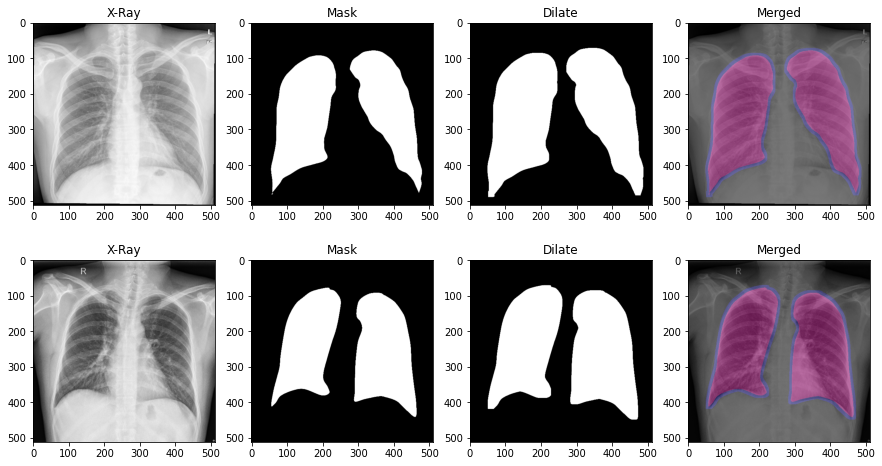

In [ ]:
base_file = os.path.basename(shenzhen_train[0].replace("_mask", ""))

image_file = os.path.join(SEGMENTATION_IMAGE_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_MASK_DIR, base_file)
dilate_image_file = os.path.join(SEGMENTATION_DILATE_DIR, base_file)

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)
                          
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].set_title("X-Ray")
axs[0, 0].imshow(image)

axs[0, 1].set_title("Mask")
axs[0, 1].imshow(mask_image)

axs[0, 2].set_title("Dilate")
axs[0, 2].imshow(dilate_image)

axs[0, 3].set_title("Merged")
axs[0, 3].imshow(merged_image)

base_file = os.path.basename(shenzhen_test[0].replace("_mask", ""))
image_file = os.path.join(SEGMENTATION_TEST_DIR, base_file)
filename, fileext = os.path.splitext(base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                               "%s_mask%s" % (filename, fileext))

filename, fileext = os.path.splitext(base_file)
image_file = os.path.join(SEGMENTATION_TEST_DIR, base_file)
mask_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                               "%s_mask%s" % (filename, fileext))
dilate_image_file = os.path.join(SEGMENTATION_TEST_DIR, \
                                 "%s_dilate%s" % (filename, fileext))

image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)

axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)

In [ ]:
train_files = glob(os.path.join(SEGMENTATION_IMAGE_DIR, "*.png"))
test_files = glob(os.path.join(SEGMENTATION_TEST_DIR, "*.png"))
mask_files = glob(os.path.join(SEGMENTATION_MASK_DIR, "*.png"))
dilate_files = glob(os.path.join(SEGMENTATION_DILATE_DIR, "*.png"))

print("Check element in all dataset:", end=" ")
(len(train_files),
len(test_files),
len(mask_files),
len(dilate_files))

Check element in all dataset: 

(604, 300, 604, 604)

In [ ]:
def adjust_data(img, mask):
  img = img / 255
  mask = mask / 255
  mask[mask > 0.5] = 1
  mask[mask <= 0.5] = 0

  return (img, mask)

In [ ]:
def train_generator(batch_size, train_path, image_folder, mask_folder, aug_dict,
                    image_color_mode = 'grayscale',
                    mask_color_mode = 'grayscale',
                    image_save_prefix = 'image',
                    mask_save_prefix = 'mask',
                    save_to_dir = None,
                    target_size = (256,256),
                    seed = 1):
  image_datagen = ImageDataGenerator(**aug_dict)
  mask_datagen = ImageDataGenerator(**aug_dict)

  image_generator = image_datagen.flow_from_directory(
      train_path,
      classes = [image_folder],
      class_mode = None,
      color_mode = image_color_mode,
      target_size = target_size,
      batch_size = batch_size,
      save_to_dir = save_to_dir,
      save_prefix = image_save_prefix,
      seed = seed
  )

  mask_generator = mask_datagen.flow_from_directory(
      train_path,
      classes = [mask_folder],
      class_mode = None,
      color_mode = mask_color_mode,
      target_size = target_size,
      batch_size = batch_size,
      save_to_dir = save_to_dir,
      save_prefix = mask_save_prefix,
      seed = 1
  )

  train_gen = zip(image_generator, mask_generator)

  for (img, mask) in train_gen:
    img, mask = adjust_data(img, mask)
    yield (img, mask)

In [ ]:
def dice_coef(y_true, y_pred):
  y_true_f = keras.flatten(y_true)
  y_pred_f = keras.flatten(y_pred)
  intersection = keras.sum(y_true_f * y_pred_f)
  return (2. * intersection + 1)/ (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

In [ ]:
def dice_coef_loss(y_true, y_pred):
  return -dice_coef(y_true, y_pred)

In [ ]:


def Unet_Architech(input_size = (256, 256, 1)):
  inputs = Input(input_size)

  conv1 = Conv2D(32, (3, 3), activation = 'relu', padding= 'same')(inputs)
  conv1 = Conv2D(32, (3, 3), activation = 'relu', padding= 'same')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(pool1)
  conv2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(conv2)
  pool2 = MaxPooling2D(pool_size = (2, 2))(conv2)

  conv3 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(pool2)
  conv3 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(conv3)
  pool3 = MaxPooling2D(pool_size = (2, 2))(conv3)

  conv4 = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(pool3)
  conv4 = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(conv4)
  pool4 = MaxPooling2D(pool_size = (2, 2))(conv4)

  conv5 = Conv2D(512, (3, 3), activation = 'relu', padding = 'same')(pool4)
  conv5 = Conv2D(512, (3, 3), activation = 'relu', padding = 'same')(conv5)

  up6 = concatenate([Conv2DTranspose(256, (2, 2), strides = (2, 2), padding = 'same')(conv5), conv4], axis = 3)
  
  conv6 = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(up6)
  conv6 = Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(conv6)

  up7 = concatenate([Conv2DTranspose(128, (2, 2), strides = (2, 2), padding = 'same')(conv6), conv3], axis = 3)

  conv7 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(up7)
  conv7 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(conv7)

  up8 = concatenate([Conv2DTranspose(64, (2, 2), strides = (2, 2), padding = 'same')(conv7), conv2], axis = 3)

  conv8 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(up8)
  conv8 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(conv8)

  up9 = concatenate([Conv2DTranspose(32, (2, 2), strides = (2, 2), padding = 'same')(conv8), conv1], axis = 3)

  conv9 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(up9)
  conv9 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(conv9)

  conv10 = Conv2D(1, (1, 1), activation = 'sigmoid')(conv9)

  return Model(inputs = [inputs], outputs = [conv10])

In [ ]:
def test_load_image(test_file, target_size = (256, 256)):
  img = cv2.imread(test_file, cv2.IMREAD_GRAYSCALE)
  img = img / 255
  img = cv2.resize(img, target_size)
  img = np.reshape(img, img.shape + (1,))
  img = np.reshape(img,(1,) + img.shape )
  return img


In [ ]:
def test_generator(test_files, target_size = (256, 256)):
  for test_file in test_files:
    yield test_load_image(test_file, target_size)
  

In [ ]:
def save_result(save_path, npyfile, test_files):
  for i, item in enumerate(npyfile):
    result_file = test_files[i]
    img = (item[:, :, 0] * 255.).astype(np.uint8)

    filename, fileext = os.path.splitext(os.path.basename(result_file))

    result_file = os.path.join(save_path, "%s_predict%s" % (filename, fileext))

    cv2.imwrite(result_file, img)

In [ ]:
def add_suffix(base_file, suffix):
  filename, fileext = os.path.splitext(base_file)
  return "%s_%s%s" % (filename, suffix, fileext)

In [ ]:
test_files = [test_file for test_file in glob(os.path.join(SEGMENTATION_TEST_DIR, "*.png"))
if ("_mask" not in test_file and "_dilate" not in test_file and "_predict" not in test_file)]

validation_data = (test_load_image(test_files[0], target_size=(512, 512)),
                   test_load_image(add_suffix(test_files[0], 'dilate'), target_size= (512, 512)))

len(test_files), len(validation_data)


(100, 2)

In [ ]:
model = Unet_Architech(input_size=(512,512,1))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

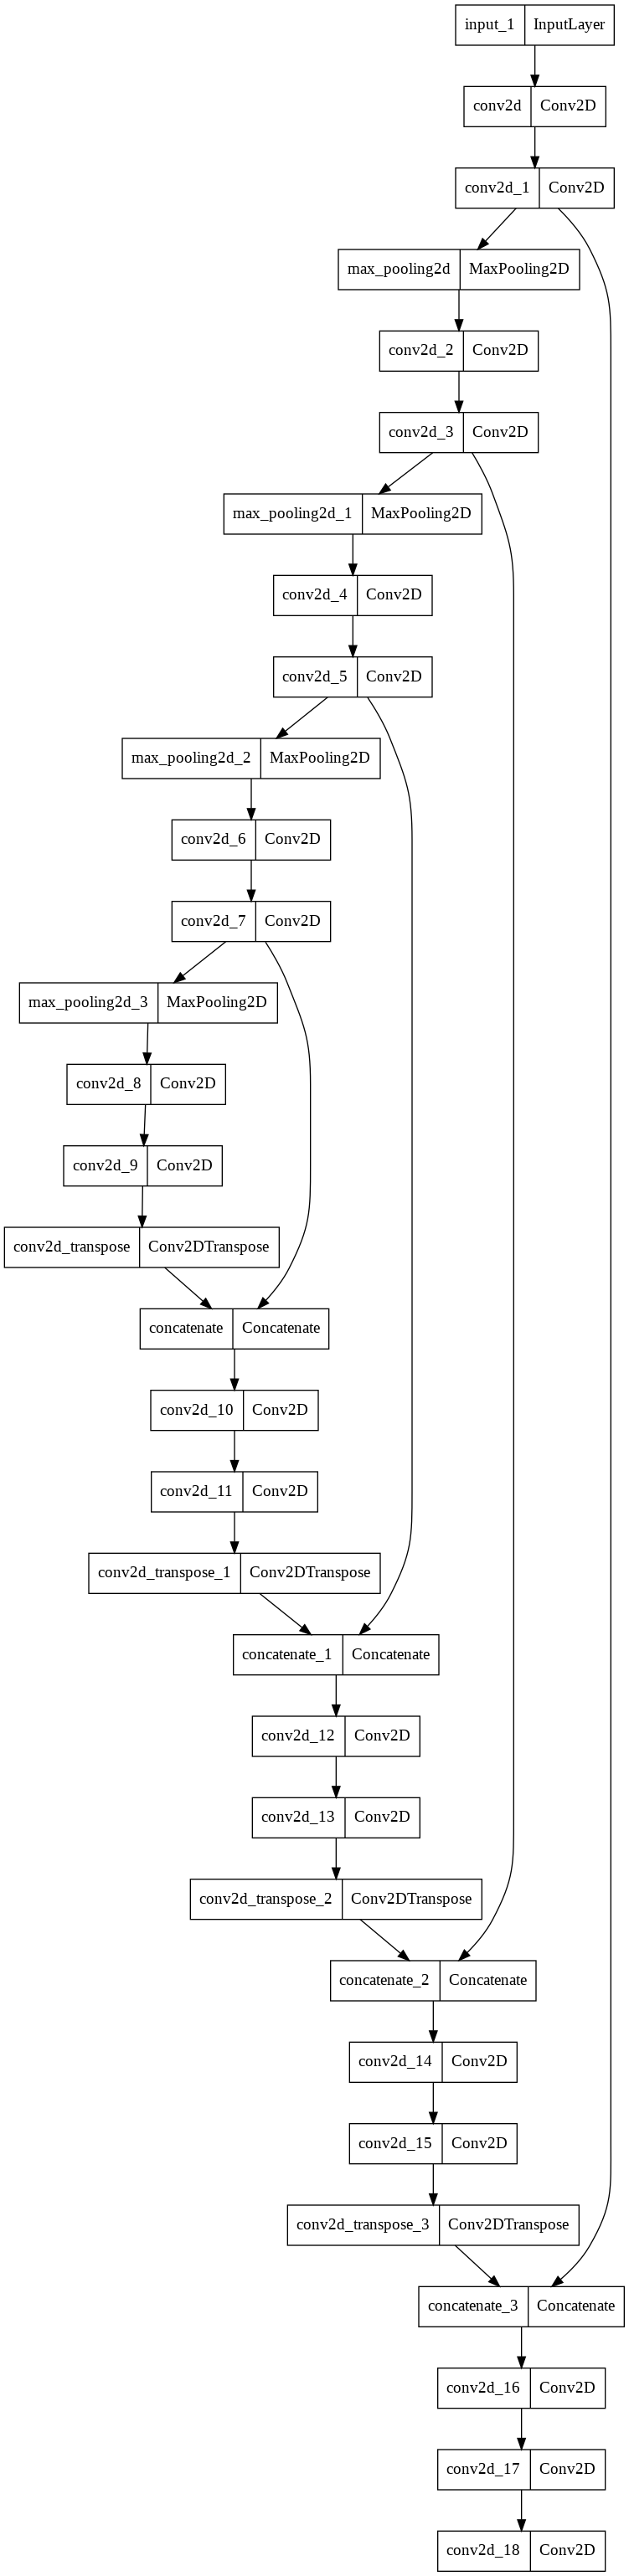

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
train_generator_args = dict(rotation_range = 0.2,
                            width_shift_range = 0.05,
                            height_shift_range = 0.05,
                            shear_range = 0.05,
                            zoom_range = 0.05,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

train_gen = train_generator(BATCH_SIZE,
                            SEGMENTATION_TRAIN_DIR,
                            'image',
                            'dilate',
                            train_generator_args,
                            target_size = (512, 512),
                            save_to_dir = os.path.abspath(SEGMENTATION_AUG_DIR))

model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, \
                  metrics=[dice_coef, 'binary_accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('unet_lung_seg.hdf5',
                                   monitor = 'loss',
                                   verbose = 1,
                                   save_best_only = True)


In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=len(train_files) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=[model_checkpoint],
                    validation_data = validation_data)

Found 604 images belonging to 1 classes.
Found 604 images belonging to 1 classes.
Epoch 1/56
302/302 [==============================] - ETA: 0s - loss: -0.4369 - dice_coef: 0.4369 - binary_accuracy: 0.3138
Epoch 1: loss improved from inf to -0.43692, saving model to unet_lung_seg.hdf5
302/302 [==============================] - 575s 2s/step - loss: -0.4369 - dice_coef: 0.4369 - binary_accuracy: 0.3138 - val_loss: -0.4550 - val_dice_coef: 0.4550 - val_binary_accuracy: 0.3218
Epoch 2/56
302/302 [==============================] - ETA: 0s - loss: -0.6035 - dice_coef: 0.6035 - binary_accuracy: 0.6256
Epoch 2: loss improved from -0.43692 to -0.60354, saving model to unet_lung_seg.hdf5
302/302 [==============================] - 488s 2s/step - loss: -0.6035 - dice_coef: 0.6035 - binary_accuracy: 0.6256 - val_loss: -0.6102 - val_dice_coef: 0.6102 - val_binary_accuracy: 0.6479
Epoch 3/56
302/302 [==============================] - ETA: 0s - loss: -0.6664 - dice_coef: 0.6664 - binary_accuracy: 0.72

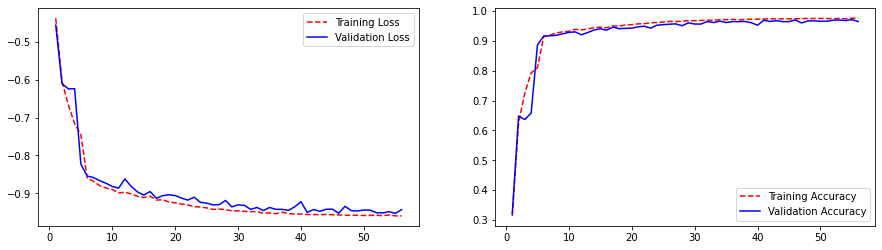

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

training_accuracy = history.history['binary_accuracy']
validation_accuracy = history.history['val_binary_accuracy']

epoch_count = range(1, len(training_loss) + 1)

axs[0].plot(epoch_count, training_loss, 'r--')
axs[0].plot(epoch_count, validation_loss, 'b-')
axs[0].legend(['Training Loss', 'Validation Loss'])

axs[1].plot(epoch_count, training_accuracy, 'r--')
axs[1].plot(epoch_count, validation_accuracy, 'b-')
axs[1].legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
test_gen = test_generator(test_files, target_size= (512, 512))
results = model.predict_generator(test_gen, len(test_files), verbose = 1)
save_result(SEGMENTATION_TEST_DIR, results, test_files)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


100/100 [==============================] - 14s 136ms/step


In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0068_0.png")
predict_image = cv2.imread('/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0068_0_predict.png')
mask_image = cv2.imread('/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0068_0_dilate.png')

fig, axs = plt.subplots(4, 3, figsize = (16, 16))

axs[0, 0].set_title('Predicted')
axs[0, 0].imshow(add_colored_mask(image, predict_image))
axs[0, 1].set_title("Gold Std.")
axs[0, 1].imshow(add_colored_mask(image, mask_image))
axs[0, 2].set_title("Diff.")
axs[0, 2].imshow(diff_mask(mask_image, predict_image))

image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0070_0.png")
predict_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0070_0.png_predict.png")
mask_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0070_0.png_dilate.png")

axs[1, 0].set_title("Predicted")
axs[1, 0].imshow(add_colored_mask(image, predict_image))
axs[1, 1].set_title("Gold Std.")
axs[1, 1].imshow(add_colored_mask(image, mask_image))
axs[1, 2].set_title("Diff.")
axs[1, 2].imshow(diff_mask(mask_image, predict_image))

# image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0020_0.png")
# predict_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0020_0_predict.png")
# mask_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0020_0_dilate.png")

# axs[2, 0].set_title("Predicted")
# axs[2, 0].imshow(add_colored_mask(image, predict_image))
# axs[2, 1].set_title("Gold Std.")
# axs[2, 1].imshow(add_colored_mask(image, mask_image))
# axs[2, 2].set_title("Diff.")
# axs[2, 2].imshow(diff_mask(mask_image, predict_image))

# image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/MCUCXR_0016_0.png")
# predict_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/MCUCXR_0016_0_predict.png")
# mask_image = cv2.imread("/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/MCUCXR_0016_0_dilate.png")

# axs[3, 0].set_title("Predicted")
# axs[3, 0].imshow(add_colored_mask(image, predict_image))
# axs[3, 1].set_title("Gold Std.")
# axs[3, 1].imshow(add_colored_mask(image, mask_image))
# axs[3, 2].set_title("Diff.")
# axs[3, 2].imshow(diff_mask(mask_image, predict_image))

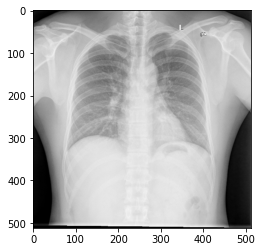

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/Dataset/CT Lung/src/segmentation/test/CHNCXR_0068_0.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
model.save('CT_Lung')

INFO:tensorflow:Assets written to: CT_Lung/assets


In [ ]:
from tensorflow.python.keras import models
model = models.load_weights('/content/gdrive/MyDrive/Dataset/CT Lung/unet_lung_seg.hdf5', custom_objects={'bce_dice_loss': dice_coef_loss,
                                                           'dice_coeff': dice_coef})

AttributeError: ignored

In [ ]:
import h5py
filename = "/content/gdrive/MyDrive/Dataset/CT Lung/unet_lung_seg.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [ ]:
!tar zcf results.tgz --directory='/content/gdrive/MyDrive/Dataset/CT Lung' .

tar: ./Montgomery/__MACOSX/MontgomerySet: file changed as we read it
tar: ./Montgomery/__MACOSX: file changed as we read it
tar: ./Montgomery/MontgomerySet/ClinicalReadings: file changed as we read it
tar: ./Montgomery/MontgomerySet/ManualMask/leftMask: file changed as we read it
tar: ./src/segmentation/train/augmentation: Cannot open: Input/output error
tar: ./src/segmentation: file changed as we read it
tar: ./CT_Lung/variables: file changed as we read it
tar: Exiting with failure status due to previous errors
